# Introduction
This project aims to analyse and compare the engagement patters of TikTok videos that are banned, in comparison to those that are not banned. The goal is to identify the relationship between user engagement and content that needs moderating. This would be a useful insight for content moderators who must prioritise their workflow. 

Existing efforts in this space focus on using the transcription of the video rather than the engagement patterns. The benefit of studying engagement patterns is that it provides a different route towards identifying harmful content that transcends languages etc.  

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Overview

In [3]:
# Loading the data
df = pd.read_csv('/Users/alex/tiktok-engagement-analysis/data/tiktok_dataset.csv')

# A quick overview of the dataset
df.head()
df.tail()
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


# Data Cleaning
Identifying missing values, and given relatively small number of problematic rows in question, removing these, as well as duplicates - which would affect the analysis since the system wouldn't be able to compute the engagement score properly. There will be further detailing of the engagement score further down the document. Since this study focuses on engagement values, I will remove other not needed columns.

I also removed rows not containing one of three status labels "active" "under review" or "banned" from the "author_ban_status" column. Then, to make the analysis easier, since "under review" shall here be treated as "banned" (on the basis that it was suspicious enough content to get put into review following a user report) I will turn these into binary classes "1" meaning "Active" and "0" refering to "banned" or "under review". 

In [4]:
# Removing rows with missing values
missing_values = df.isnull().sum()
print(missing_values)
df_cleaned = df.dropna()

# Dropping duplicates
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned = df_cleaned.drop(['claim_status','video_transcription_text', 'verified_status'], axis=1)
print(df_cleaned.columns)

# Sorting the author_ban_status column
df_cleaned['author_ban_status'] = df_cleaned['author_ban_status'].str.strip().str.lower()
df_cleaned['author_ban_status'] = df_cleaned['author_ban_status'].replace('under review', 'under_review')
df_cleaned['author_ban_status_binary'] = df_cleaned['author_ban_status'].apply(lambda x: 1 if x == 'active' else 0)
print(df_cleaned['author_ban_status_binary'])


#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64
Index(['#', 'video_id', 'video_duration_sec', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')
0        0
1        1
2        1
3        1
4        1
        ..
19079    1
19080    1
19081    1
19082    1
19083    1
Name: author_ban_status_binary, Length: 19084, dtype: int64


# Summary Stats - numerical and categorical columns
Understanding the distribution of video_view_count, video_like_count, video_share_count and video_comment_count to visualise the key engagement metrics. These numerical distributions are highly skewed so I will be using logarithmic scaling to get a better view of the patterns.

For the categorical columns, verified_status, claim_status and author_ban_status, it makes sense to plot bar charts to explore the distribution of each category.

/Users/alex/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alex/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alex/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alex/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

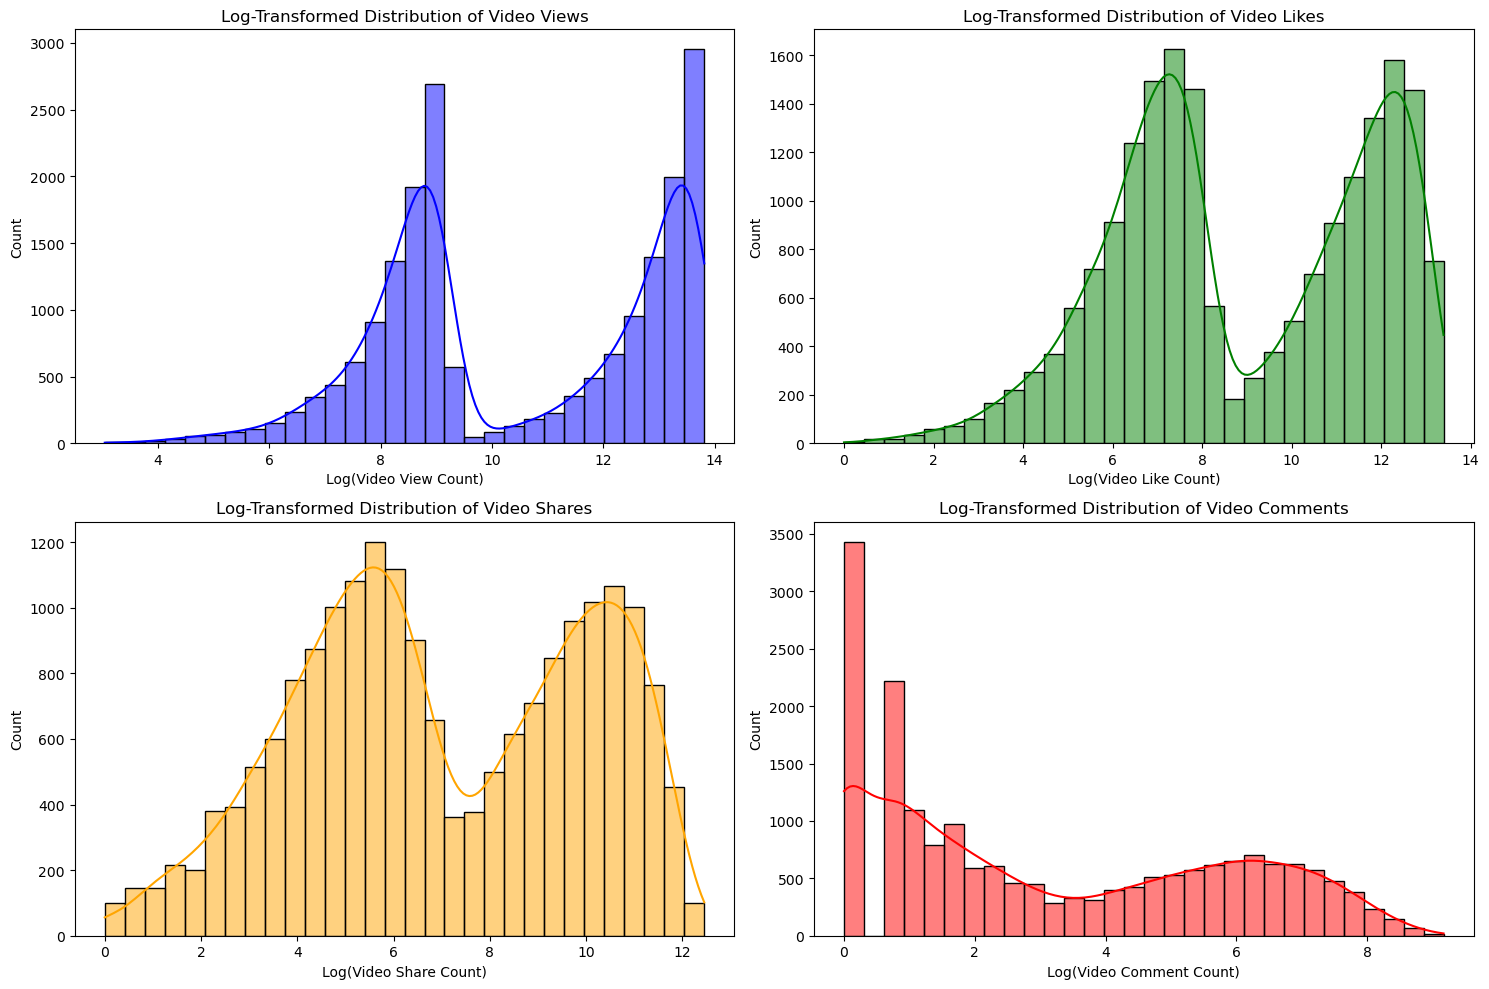

In [5]:
# Adding 1 to avoid log(0) which is undefined
df['log_video_view_count'] = np.log1p(df['video_view_count'])
df['log_video_like_count'] = np.log1p(df['video_like_count'])
df['log_video_share_count'] = np.log1p(df['video_share_count'])
df['log_video_comment_count'] = np.log1p(df['video_comment_count'])

plt.figure(figsize=(15, 10))

# Plotting the distribution of log-transformed video view count
plt.subplot(2, 2, 1)
sns.histplot(df['log_video_view_count'], bins=30, kde=True, color='blue')
plt.title('Log-Transformed Distribution of Video Views')
plt.xlabel('Log(Video View Count)')

# Plotting the distribution of log-transformed video like count
plt.subplot(2, 2, 2)
sns.histplot(df['log_video_like_count'], bins=30, kde=True, color='green')
plt.title('Log-Transformed Distribution of Video Likes')
plt.xlabel('Log(Video Like Count)')

# Plotting the distribution of log-transformed video share count
plt.subplot(2, 2, 3)
sns.histplot(df['log_video_share_count'], bins=30, kde=True, color='orange')
plt.title('Log-Transformed Distribution of Video Shares')
plt.xlabel('Log(Video Share Count)')

# Plotting the distribution of log-transformed video comment count
plt.subplot(2, 2, 4)
sns.histplot(df['log_video_comment_count'], bins=30, kde=True, color='red')
plt.title('Log-Transformed Distribution of Video Comments')
plt.xlabel('Log(Video Comment Count)')

plt.tight_layout()

plt.show()



/Users/alex/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alex/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alex/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alex/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

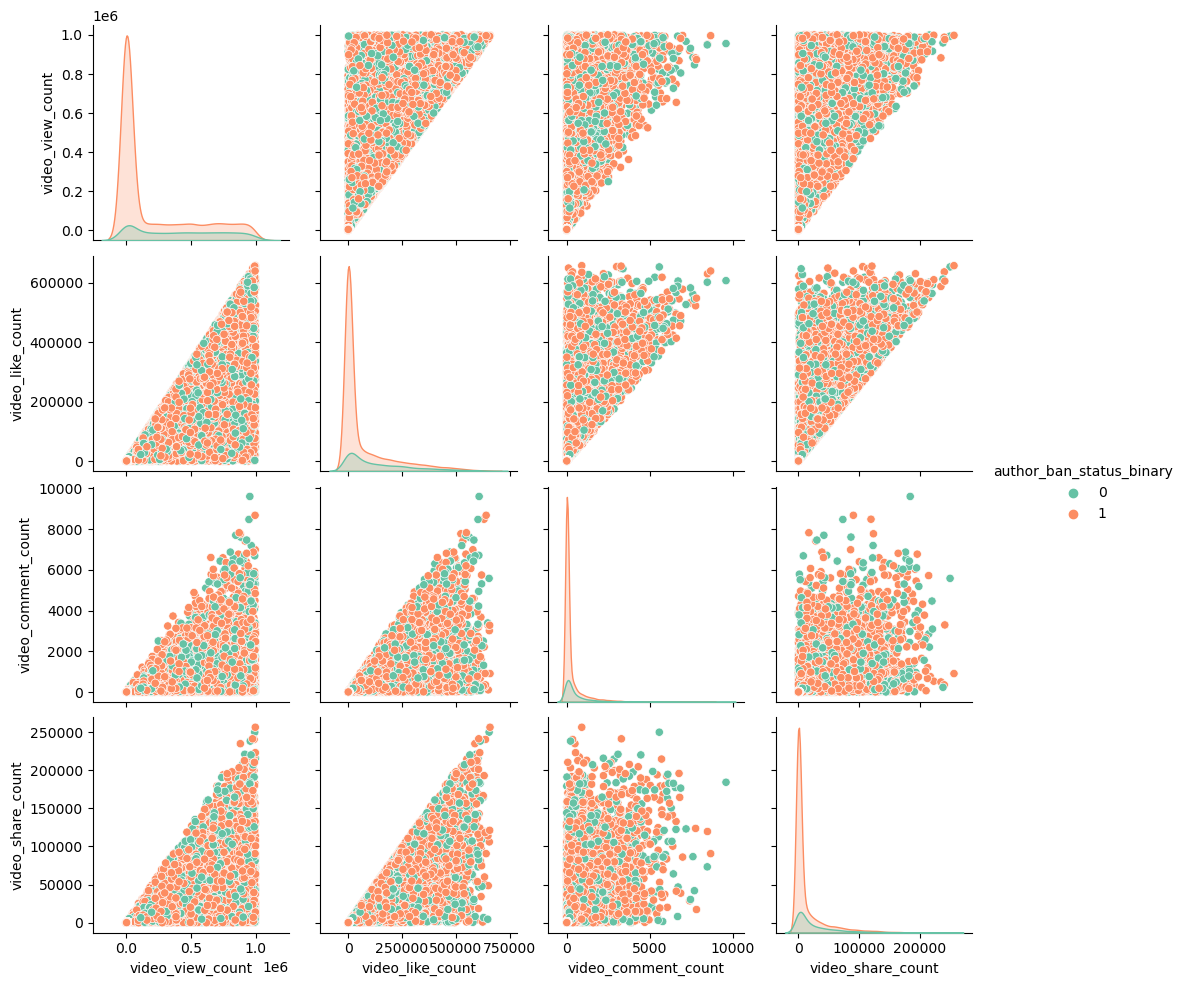

In [12]:
# Creating a pairplot

columns_to_plot = ['video_view_count', 'video_like_count', 'video_comment_count', 'video_share_count', 'author_ban_status_binary']
sns.pairplot(df[columns_to_plot], hue='author_ban_status_binary', diag_kind='kde', palette='Set2')
plt.show()


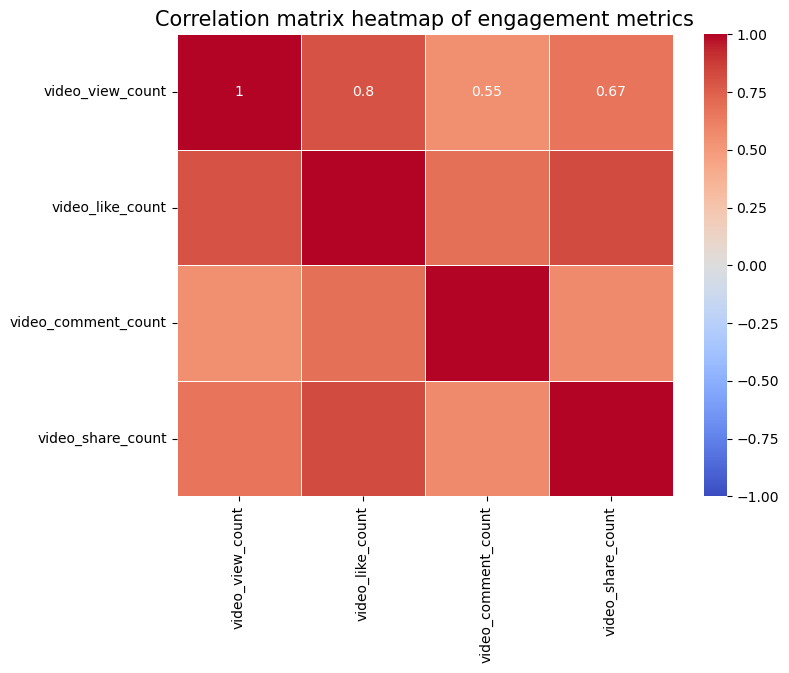

In [14]:
# Correlation matrix

engagement_metrics = ['video_view_count', 'video_like_count', 'video_comment_count', 'video_share_count']
correlation_matrix = df[engagement_metrics].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

plt.title('Correlation matrix heatmap of engagement metrics', fontsize=15)
plt.show()


#### Analysis:

Log transformed graphs:

Common patters: all 4 show skewness, even after the log transformation. Views, likes and shares all have a bimodal distribution which could indicate distinct group behaviours.
The distributions are typical of social media, where a minority of content captures the majority of interactions. 

View/ like/ share count graph - we see that there are two groups of videos, some gaining far more virality than others. The similarity in patterns could indicate that the three engagement metrics are correlated - videos with views are more likely to get likes and shares, etc.

Comments have a different shape, very skewed towards lower values. This could be related to the "switch off comments" feature used in many viral videos, or could also suggest that commenting requires a higher level of engagement than the other metrics.

Pair plots:

In most of the scatter plots, there is significant overlap between banned and active content, meaning the two categories don't show clear visual clustering. This implies that banned posts don’t have an obvious, easily separable engagement pattern compared to active posts.
There is a high correlation between engagement metrics. 
Feature engineering could be a worthwhile exploration to see whether this differentiates banned content  Furthermore, a machine learning model may uncover more complex relationships.

Correlation analysis:

The heatmap shows strong and moderate correlations - it might be important to evaluate the types of engagement scores, for example weighted engagement scores, which better represent the fact that areas like commenting take more time from the user and thus have a less strong correlation with the metrics that are more the result of passive viewing.

Summary statistics:
author_ban_status_binary
1    15663
0     3719
Name: count, dtype: int64

Percentage distribution:
author_ban_status_binary
1    80.812094
0    19.187906
Name: count, dtype: float64



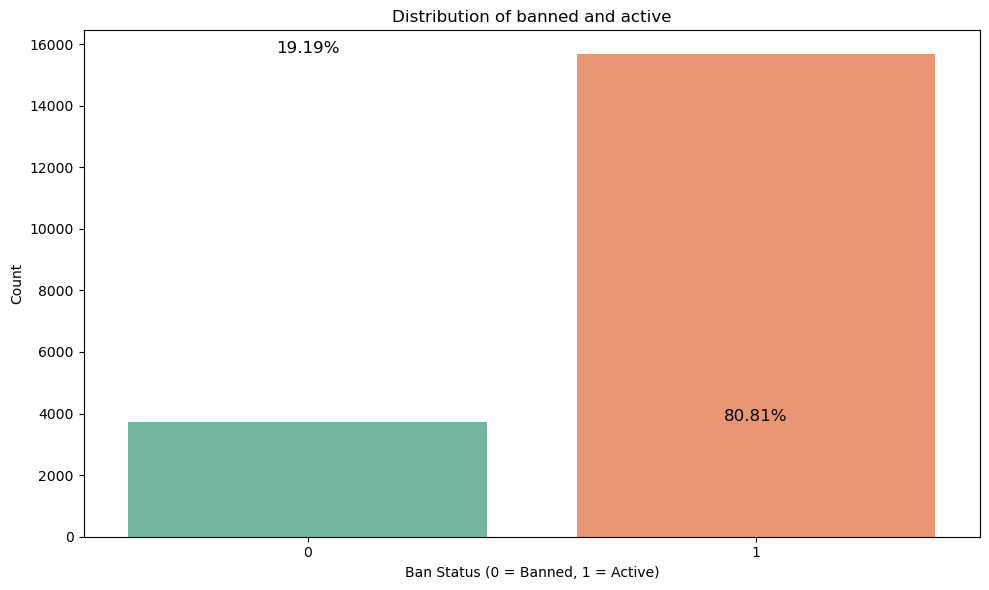

In [15]:
df['author_ban_status_binary'] = df['author_ban_status'].apply(lambda x: 1 if x == 'active' else 0)

status_counts = df['author_ban_status_binary'].value_counts()
total = status_counts.sum()
percentages = (status_counts / total) * 100

print(f"Summary statistics:\n{status_counts}\n")
print(f"Percentage distribution:\n{percentages}\n")

plt.figure(figsize=(10, 6))

sns.countplot(x='author_ban_status_binary', data=df, palette='Set2')

plt.title('Distribution of banned and active')
plt.xlabel('Ban Status (0 = Banned, 1 = Active)')
plt.ylabel('Count')

for i, count in enumerate(status_counts):
    percentage = percentages[i]
    plt.text(i, count + 50, f'{percentage:.2f}%', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

#### Analysis:

From the summary statistics we see about 20% of the claims made by users were indeed escalated in content moderation. 

This is useful information for designing the training and test data splits in the modelling steps. 

# Exploring engagement score formulas

The first formula to be plotted is the classic industry standard formula: (Likes + Comments + Shares + Downloads) / Views

The second will be a weighted formula: (Likes + 2 * Comments + 3 * Shares + 3 * Downloads) / Views 
The second formula accounts for the different level of user engagement each action entail. Weighted formulas are used by social media recommendation algorithms to best represent potential interesting content.

/Users/alex/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


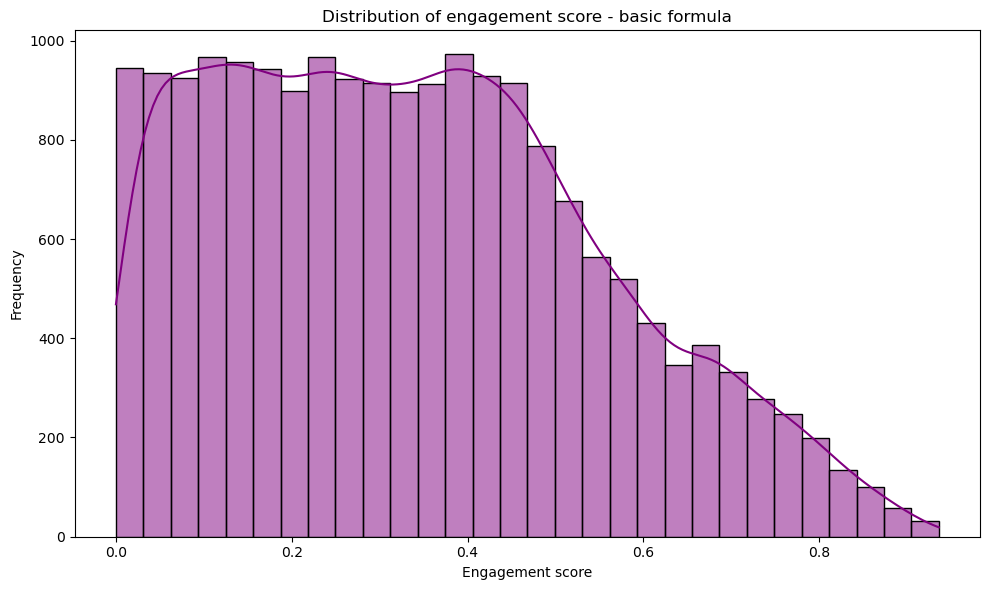

In [16]:
df['engagement_score'] = (df['video_like_count'] + df['video_comment_count'] + df['video_share_count'] + df['video_download_count']) / df['video_view_count']

plt.figure(figsize=(10, 6))

sns.histplot(df['engagement_score'], bins=30, kde=True, color='purple')
plt.title('Distribution of engagement score - basic formula')
plt.xlabel('Engagement score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


/Users/alex/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


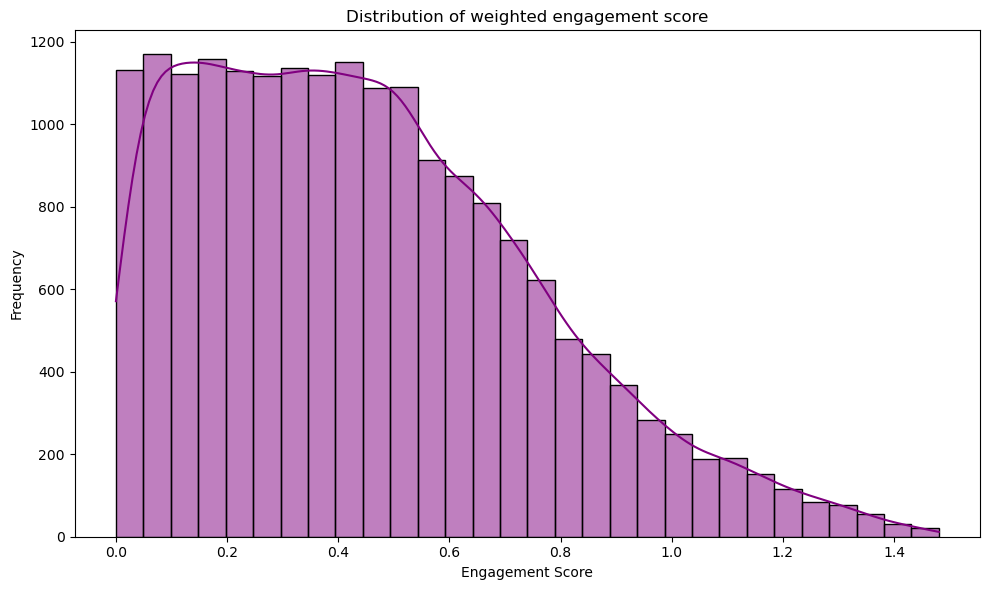

In [17]:
# Adjusting the engagement score formula with weighted metrics
df['engagement_score'] = (df['video_like_count'] + 2 * df['video_comment_count'] + 3 * df['video_share_count'] + 3 * df['video_download_count']) / df['video_view_count']

# Plotting the distribution of the adjusted engagement score
plt.figure(figsize=(10, 6))

# Plotting the histogram with KDE
sns.histplot(df['engagement_score'], bins=30, kde=True, color='purple')
plt.title('Distribution of weighted engagement score')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Exploring engagement scores vs moderation status:

Using both the basic engagement formula, and the weighted one  

Summary statistics for basic engagement score:
count    19084.000000
mean         0.331907
std          0.211038
min          0.000000
25%          0.155787
50%          0.315662
75%          0.475015
max          0.932741
Name: basic_engagement_score, dtype: float64

Summary statistics for weighted engagement score:
count    19084.000000
mean         0.452882
std          0.304498
min          0.000000
25%          0.205455
50%          0.414296
75%          0.648680
max          1.480615
Name: weighted_engagement_score, dtype: float64


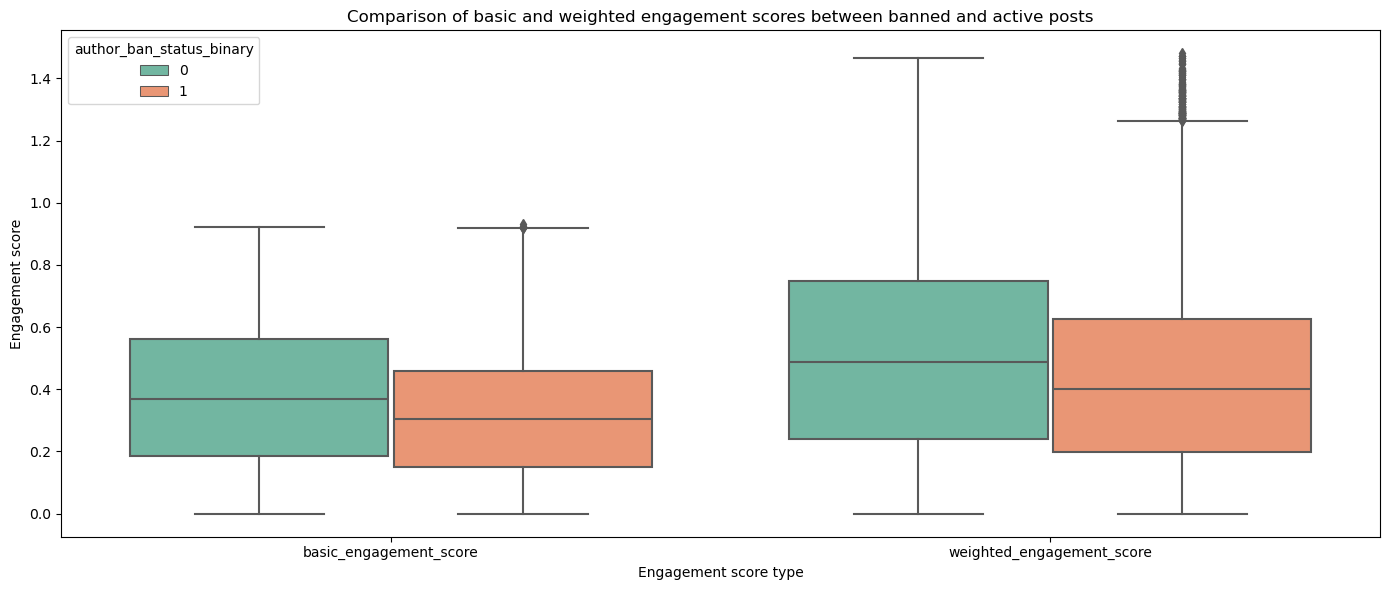

In [18]:
# Step 1: Calculate the basic engagement score
df['basic_engagement_score'] = (df['video_like_count'] + df['video_comment_count'] + df['video_share_count']) / df['video_view_count']

# Step 2: Calculate the weighted engagement score
df['weighted_engagement_score'] = (df['video_like_count'] + 2 * df['video_comment_count'] + 3 * df['video_share_count'] + 3 * df['video_download_count']) / df['video_view_count']

# Ensure there's no conflict with the column name 'engagement_score'
if 'engagement_score' in df.columns:
    df.drop(columns=['engagement_score'], inplace=True)

# Step 3: Melt the DataFrame to have engagement scores as a single column
df_melted = df.melt(id_vars=['author_ban_status_binary'], 
                    value_vars=['basic_engagement_score', 'weighted_engagement_score'], 
                    var_name='engagement_type', 
                    value_name='engagement_score_melted')

# Step 4: Summary statistics for basic and weighted engagement scores
print("Summary statistics for basic engagement score:")
print(df['basic_engagement_score'].describe())
print("\nSummary statistics for weighted engagement score:")
print(df['weighted_engagement_score'].describe())

# Step 5: Visualize the comparison using side-by-side boxplots
plt.figure(figsize=(14, 6))

# Create the boxplot for both engagement types
sns.boxplot(x='engagement_type', y='engagement_score_melted', hue='author_ban_status_binary', data=df_melted, palette='Set2')

# Adding labels
plt.title('Comparison of basic and weighted engagement scores between banned and active posts')
plt.xlabel('Engagement score type')
plt.ylabel('Engagement score')

# Show plot
plt.tight_layout()
plt.show()



#### Analysis:

The distributions using both engagement score formulas are very similar suggesting either could work for the investigation's purposes.

The box plots indicate that the posts that are of status "0" aka that were escalated post their being reported, have higher engagement scores. They also have higher variability though the total ranges are similar. 

The weighted engagement formula shows an even higher score for banned (0) posts than active (1) ones, suggesting that banned posts may get more likes, comments, shares and downloads, which aligns with the fact that they may automatically have their views somewhat limited by the recommendation algorithm. Thus it suggests that banned posts are more likely to generate user engagement past just views and likes. The bigger variability could also account for the fact that this observation depends on the type of bannable post in question. 

Overall however, in investigating whether engagement could predict moderation, the weighted algorithm feels most appropriate to use in modelling as it is more representative of the nuances of different engagement types and the amount of effort they require from a user. Capturing this is important as it adds precision to a potential model that could characterise engagement types as suggestive of moderatable content. 